## Task 2: Develop Time Series Forecasting Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# Load the preprocessed data
df_TSLA = pd.read_csv('../data/processed/TSLA_processed.csv')
df_BND = pd.read_csv('../data/processed/BND_processed.csv')
df_SPY = pd.read_csv('../data/processed/SPY_processed.csv')

In [4]:
df_TSLA.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,MA20,MA50,MA200,Volatility
0,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0,-0.042041,NaN,NaN,NaN,NaN
2,14.004000,14.280000,13.614000,14.085333,93928500,0.0,0.0,0.005664,NaN,NaN,NaN,NaN
3,14.223333,14.318667,13.985333,14.063333,44526000,0.0,0.0,-0.001562,NaN,NaN,NaN,NaN
4,14.187333,14.253333,14.000667,14.041333,51637500,0.0,0.0,-0.001564,NaN,NaN,NaN,NaN


In [5]:
df_BND.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Daily_Return,MA20,MA50,MA200,Volatility
0,63.190117,63.389433,63.182450,63.358768,2218800,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,63.427742,63.565729,63.397078,63.542732,5820100,0.0,0.0,0.0,0.002904,NaN,NaN,NaN,NaN
2,63.650095,63.918401,63.650095,63.726753,3887600,0.0,0.0,0.0,0.002896,NaN,NaN,NaN,NaN
3,63.734381,63.841703,63.665390,63.765045,2433400,0.0,0.0,0.0,0.000601,NaN,NaN,NaN,NaN
4,63.711353,63.711353,63.604031,63.665359,1873400,0.0,0.0,0.0,-0.001563,NaN,NaN,NaN,NaN


In [6]:
df_SPY.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Daily_Return,MA20,MA50,MA200,Volatility
0,173.974595,174.396086,172.120025,173.173752,121465900,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,172.111598,172.280192,169.734396,170.046295,169632600,0.0,0.0,0.0,-0.018060,NaN,NaN,NaN,NaN
2,170.358170,170.889252,167.635342,168.444611,209151400,0.0,0.0,0.0,-0.009419,NaN,NaN,NaN,NaN
3,169.793432,170.889312,169.338228,170.543686,125346700,0.0,0.0,0.0,0.012462,NaN,NaN,NaN,NaN
4,171.976757,173.789176,171.959906,173.569992,147217800,0.0,0.0,0.0,0.017745,NaN,NaN,NaN,NaN


In [7]:
# Split the data into training and testing sets
train_size = int(len(df_BND) * 0.8)
df_BND_train = df_BND.iloc[:train_size]
df_BND_test = df_BND.iloc[train_size:]

### ARIMA MODEL 

In [8]:
# ARIMA Model
print("Developing ARIMA Model for BND")
arima_model = ARIMA(df_BND_train['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
#arima_forecast = arima_model_fit.forecast(steps=len(df_BND_test))[0]
arima_forecast = arima_model_fit.forecast(steps=len(df_BND_test))


Developing ARIMA Model for BND


In [9]:
arima_mae = mean_absolute_error(df_BND_test['Close'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(df_BND_test['Close'], arima_forecast))
arima_mape = mean_absolute_percentage_error(df_BND_test['Close'], arima_forecast)

In [10]:
print(f"ARIMA Model Performance:")
print(f"MAE: {arima_mae:.2f}")
print(f"RMSE: {arima_rmse:.2f}")
print(f"MAPE: {arima_mape:.2f}%")

ARIMA Model Performance:
MAE: 2.98
RMSE: 3.54
MAPE: 0.04%


### SARIMA Model

In [11]:
# SARIMA Model
print("Developing SARIMA Model for BND")
sarima_model = SARIMAX(df_BND_train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
#sarima_forecast = sarima_model_fit.forecast(steps=len(df_BND_test))[0]
sarima_forecast = sarima_model_fit.forecast(steps=len(df_BND_test))

sarima_mae = mean_absolute_error(df_BND_test['Close'], sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(df_BND_test['Close'], sarima_forecast))
sarima_mape = mean_absolute_percentage_error(df_BND_test['Close'], sarima_forecast)

print(f"SARIMA Model Performance:")
print(f"MAE: {sarima_mae:.2f}")
print(f"RMSE: {sarima_rmse:.2f}")
print(f"MAPE: {sarima_mape:.2f}%")

Developing SARIMA Model for BND
SARIMA Model Performance:
MAE: 4.44
RMSE: 5.20
MAPE: 0.06%


In [12]:
# confidence intervals to assess forecast reliability.
sarima_model_fit.get_forecast(steps=len(df_BND_test)).conf_int()

,lower Close,upper Close
1986,66.922311,67.829220
1987,66.717968,67.976809
1988,66.579730,68.098887
1989,66.436776,68.170402
1990,66.298995,68.218958
...,...,...
2478,53.426875,75.395966
2479,53.388539,75.391537
2480,53.347741,75.384574
2481,53.320868,75.391473


Plot  for the actual values of df_BND_test['Close'] against the sarima_forecast to visually assess the accuracy of the SARIMA model.

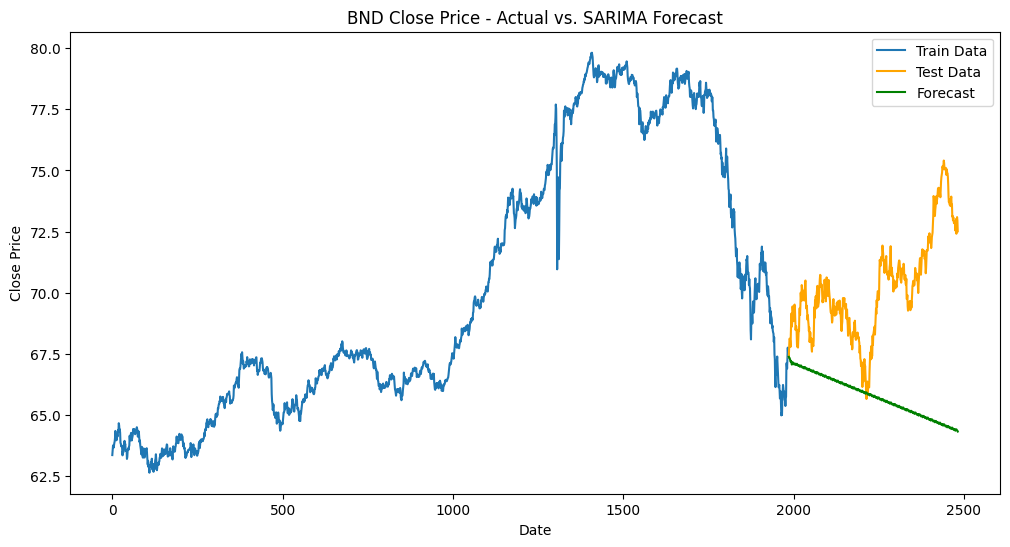

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_BND_train['Close'], label='Train Data')
plt.plot(df_BND_test['Close'], label='Test Data', color='orange')
plt.plot(df_BND_test.index, sarima_forecast, label='Forecast', color='green')
plt.title("BND Close Price - Actual vs. SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


Residuals (actual minus predicted values) to check for patterns

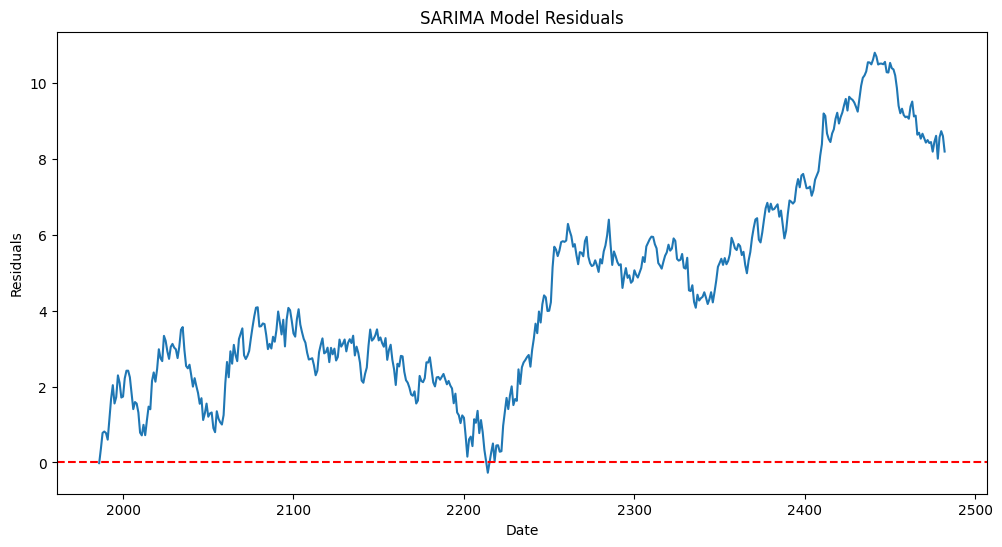

In [14]:
residuals = df_BND_test['Close'] - sarima_forecast
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("SARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

Residual Autocorrelation (ACF) Plot

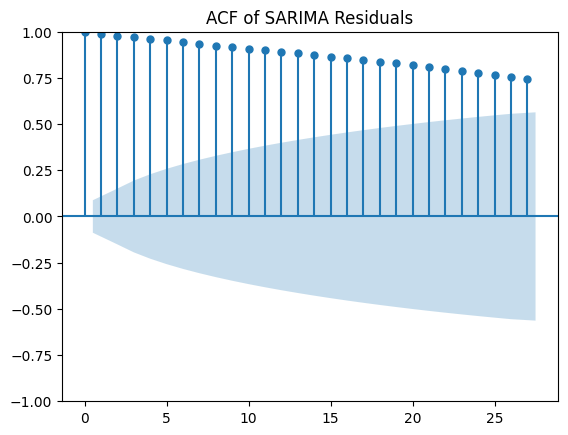

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.title("ACF of SARIMA Residuals")
plt.show()

Displaying confidence intervals around forecasted values to provide insights into the forecast’s uncertainty.

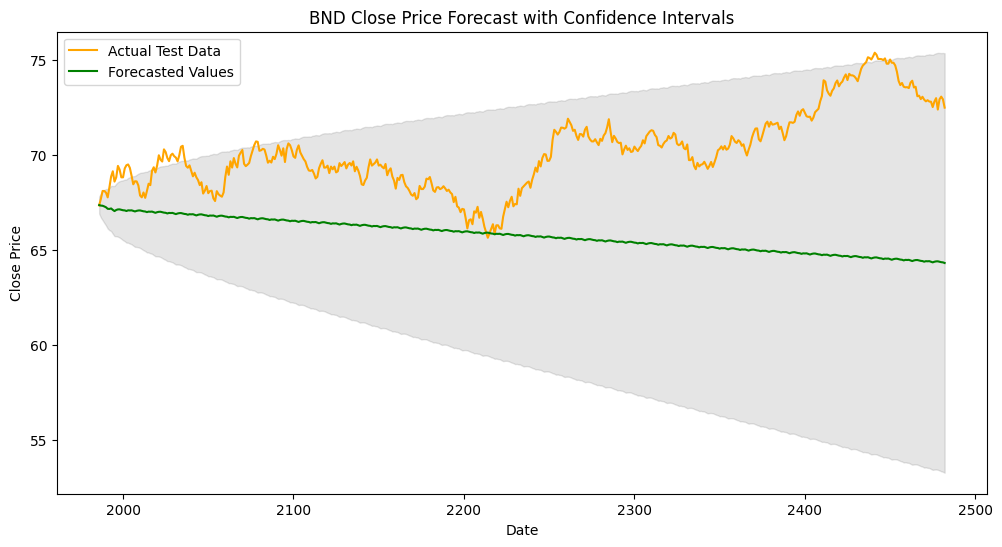

In [16]:
sarima_forecast_ci = sarima_model_fit.get_forecast(steps=len(df_BND_test)).conf_int()
plt.figure(figsize=(12, 6))
plt.plot(df_BND_test['Close'], label="Actual Test Data", color="orange")
plt.plot(df_BND_test.index, sarima_forecast, label="Forecasted Values", color="green")
plt.fill_between(df_BND_test.index, 
                 sarima_forecast_ci.iloc[:, 0], 
                 sarima_forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title("BND Close Price Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


seasonal decomposition

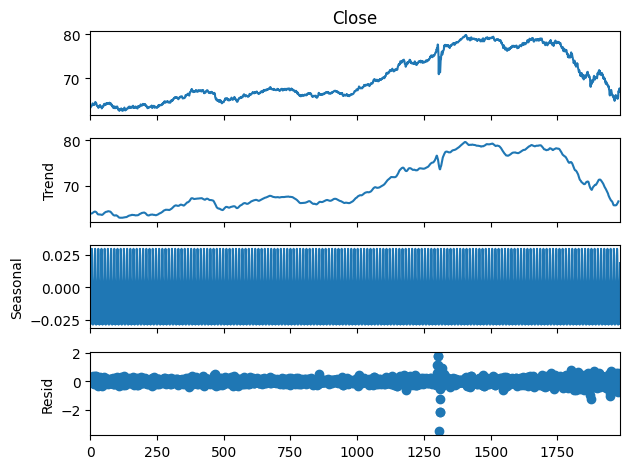

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_BND_train['Close'], model='additive', period=12)
decomposition.plot()
plt.show()

### LSTM Model

In [18]:
# LSTM Model
print("Developing LSTM Model for BND")
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, 1), return_sequences=False))  # Change input_shape to (1, 1)
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape X_train to (len(df_BND_train), 1, 1)
X_train = df_BND_train[['Close']].values.reshape((len(df_BND_train), 1, 1))
y_train = df_BND_train['Close'].values

# Train the model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Reshape X_test to (len(df_BND_test), 1, 1)
X_test = df_BND_test[['Close']].values.reshape((len(df_BND_test), 1, 1))
lstm_forecast = lstm_model.predict(X_test)

# Evaluate the model
lstm_mae = mean_absolute_error(df_BND_test['Close'], lstm_forecast.flatten())
lstm_rmse = np.sqrt(mean_squared_error(df_BND_test['Close'], lstm_forecast.flatten()))
lstm_mape = mean_absolute_percentage_error(df_BND_test['Close'], lstm_forecast.flatten())

print(f"LSTM Model Performance:")
print(f"MAE: {lstm_mae:.2f}")
print(f"RMSE: {lstm_rmse:.2f}")
print(f"MAPE: {lstm_mape:.2f}%")


Developing LSTM Model for BND
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
LSTM Model Performance:
MAE: 2.66
RMSE: 3.24
MAPE: 0.04%


LSTM Actual vs. Forecasted Plot

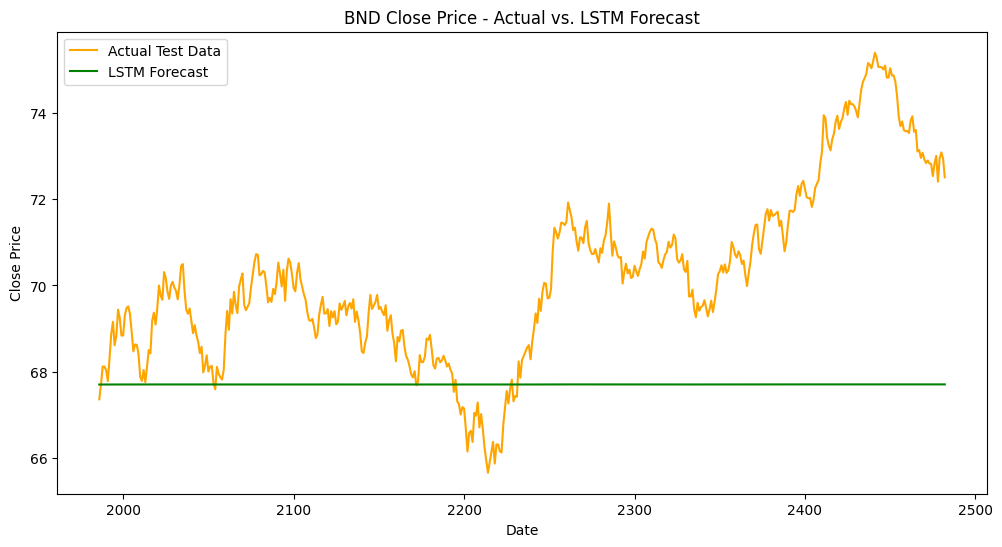

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df_BND_test.index, df_BND_test['Close'], label="Actual Test Data", color="orange")
plt.plot(df_BND_test.index, lstm_forecast, label="LSTM Forecast", color="green")
plt.title("BND Close Price - Actual vs. LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

LSTM Loss Curve 

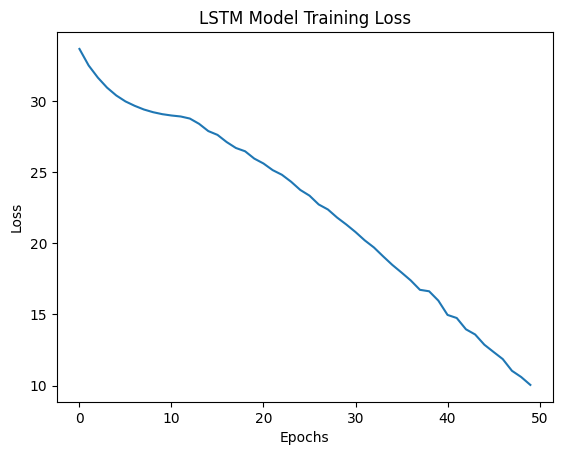

In [20]:
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
plt.plot(history.history['loss'])
plt.title('LSTM Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

LSTM Residual Plot 

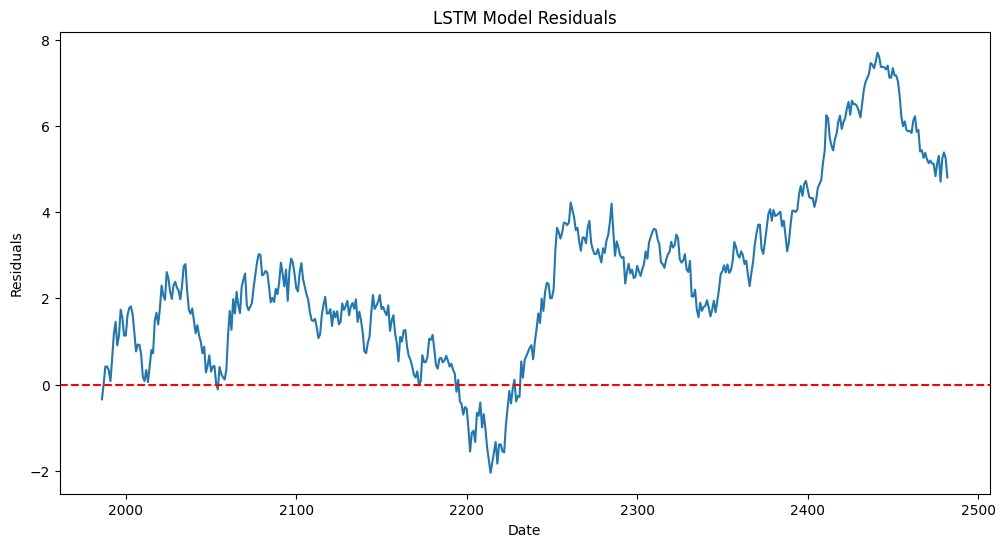

In [21]:
lstm_residuals = df_BND_test['Close'] - lstm_forecast.flatten()
plt.figure(figsize=(12, 6))
plt.plot(lstm_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("LSTM Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

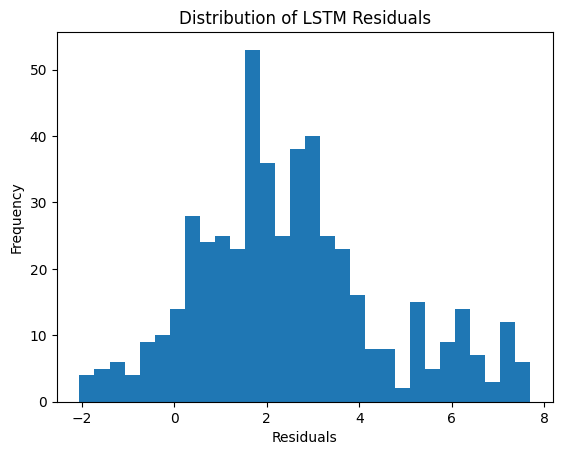

In [22]:
plt.hist(lstm_residuals, bins=30)
plt.title("Distribution of LSTM Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

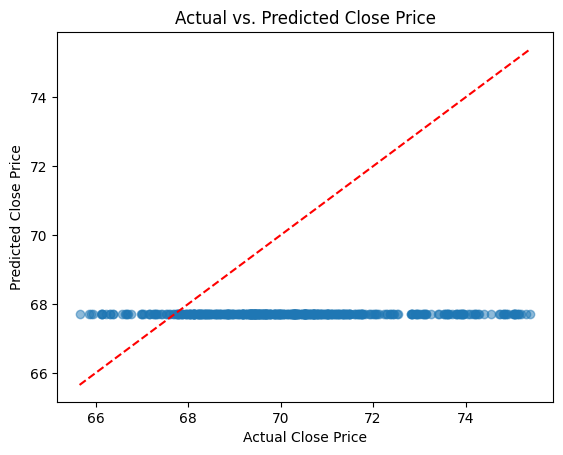

In [23]:
plt.scatter(df_BND_test['Close'], lstm_forecast.flatten(), alpha=0.5)
plt.plot([df_BND_test['Close'].min(), df_BND_test['Close'].max()], 
         [df_BND_test['Close'].min(), df_BND_test['Close'].max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price")
plt.show()

### Model Performance Comparison 

In [24]:
# Compare Model Performance
print("Comparing Model Performance:")
print(f"ARIMA MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%")
print(f"LSTM MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f}, MAPE: {lstm_mape:.2f}%")

Comparing Model Performance:
ARIMA MAE: 2.98, RMSE: 3.54, MAPE: 0.04%
SARIMA MAE: 4.44, RMSE: 5.20, MAPE: 0.06%
LSTM MAE: 2.66, RMSE: 3.24, MAPE: 0.04%


In [25]:
# Select the best model based on performance metrics
if arima_mape < sarima_mape and arima_mape < lstm_mape:
    best_model = "ARIMA"
    best_forecast = arima_forecast
elif sarima_mape < arima_mape and sarima_mape < lstm_mape:
    best_model = "SARIMA"
    best_forecast = sarima_forecast
else:
    best_model = "LSTM"
    best_forecast = lstm_forecast.flatten()

print(f"The best model is {best_model} based on MAPE.")

The best model is LSTM based on MAPE.


The best model is LSTM based on MAPE.


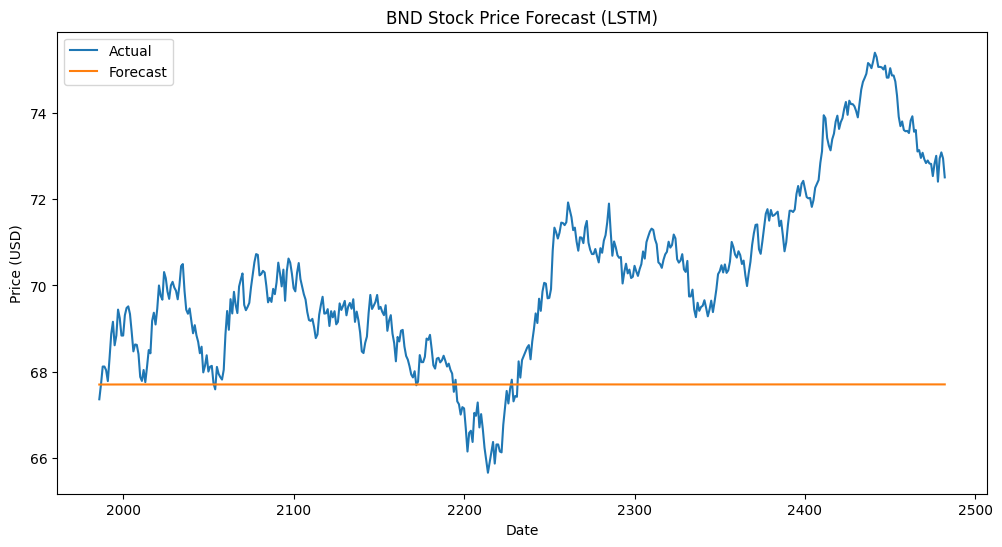

In [26]:
print(f"The best model is {best_model} based on MAPE.")

# Visualize the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_BND_test.index, df_BND_test['Close'], label='Actual')
plt.plot(df_BND_test.index, best_forecast, label='Forecast')
plt.title(f"BND Stock Price Forecast ({best_model})")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()